# 1. Import Libraries

In [1]:
# 1. Import Librariesimport numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/small_mnist.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Exploratory Data Analysis (EDA)

### Data Information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 12.0 MB


In [4]:
df.shape

(2000, 785)

### Data Description

In [5]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,2000.000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0
mean,4.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.182000,0.133500,0.077000,0.094500,0.059500,0.0,0.0,0.0,0.0,0.0
std,2.873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.469263,4.267292,3.206901,4.181664,2.660921,0.0,0.0,0.0,0.0,0.0
min,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223.000000,156.000000,143.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


### Check Missing Value

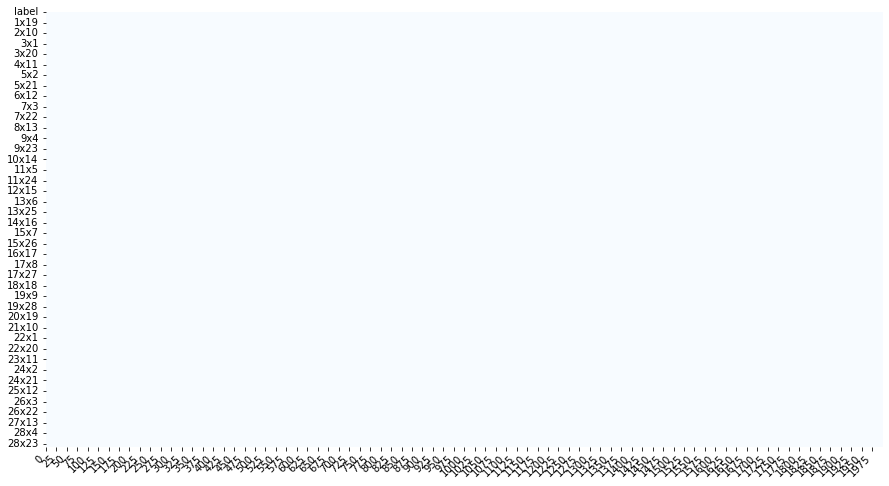

In [6]:
plot_missing_value(df)

## Check Imbalance Dataset

### label distribution (target variable)

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

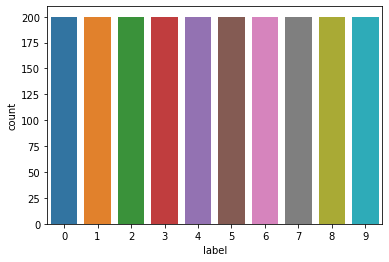

In [7]:
sns.countplot(df.label)

In [8]:
df.label.value_counts()

0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: label, dtype: int64

`The target variable explains the dataset is balanced.`

# 4. Dataset Splitting

In [9]:
X = df.drop(columns= 'label').values/255
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

### Visualize Random Data

In [10]:
X_train.shape 

(1600, 784)

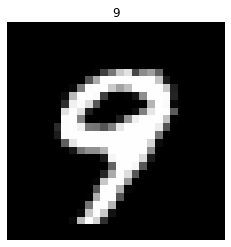

In [11]:
N = len(X_train) 
idx = np.random.choice(N) 
img, label = X_train[idx], y_train[idx] 

plt.imshow(img.reshape(28, 28), cmap = 'gray')
plt.title(label)
plt.axis('off');

# 5. Modeling

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [13]:
pipeline = Pipeline([
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3,  n_iter= 50, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed: 17.6min finished
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.8347886858974456, 'algo__gamma': 1, 'algo__learning_rate': 0.020018663891407017, 'algo__max_depth': 6, 'algo__n_estimators': 179, 'algo__reg_alpha': 0.0014557961490251987, 'algo__reg_lambda': 0.23097861492693586, 'algo__subsample': 0.6387821809211413}
0.995625 0.8912522573799636 0.905


## 5.1. Visualize Random Choice Prediction

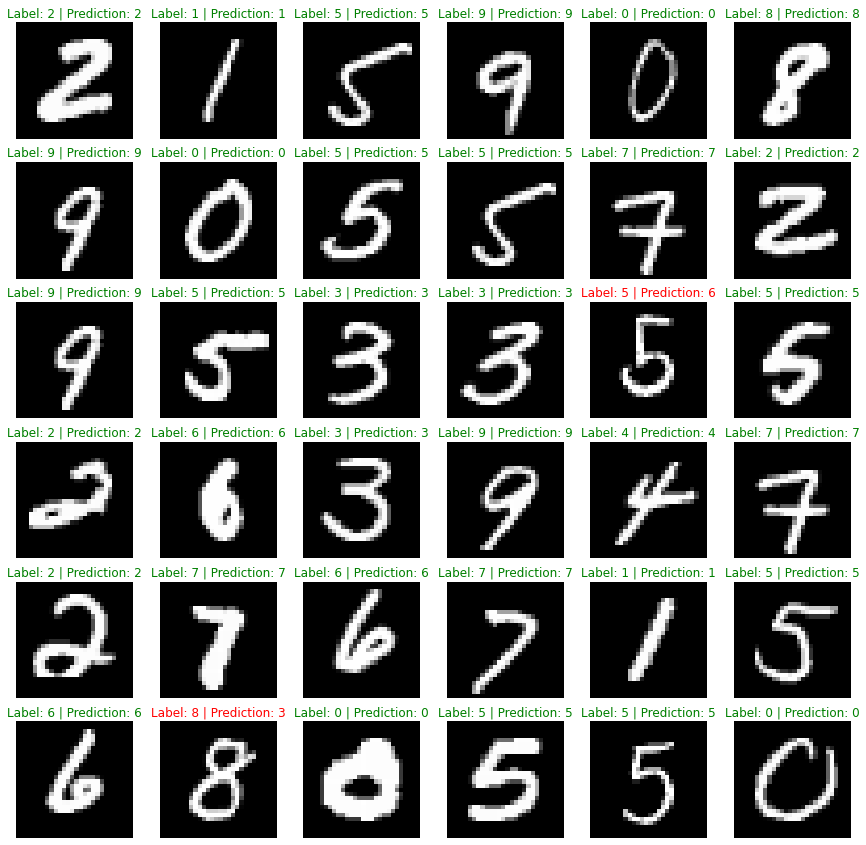

In [14]:
idx = np.random.choice(len(X_test), size = 36, replace = True)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6,6, figsize = (15,15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {'color': 'g'} if label == pred else {'color':'r'}
    
    ax.imshow(img.reshape(28,28), cmap = 'gray')
    ax.set_title(f'Label: {label} | Prediction: {pred}', fontdict = font)
    ax.axis ('off');

# 6. Hyperparameters Tuning

In [15]:
from jcopml.tuning.space import Integer, Real

In [38]:
pipeline = Pipeline([
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

parameter = {'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=100, high=350),
             'algo__subsample': Real(low=0.2, high=0.8, prior='uniform'),
             'algo__gamma': Integer(low=1, high=5),
             'algo__colsample_bytree': Real(low=0.3, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-4, high=1, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, cv=3, scoring='accuracy', n_iter= 50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 29.6min finished
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.662425945369236, 'algo__gamma': 1, 'algo__learning_rate': 0.05043830321793341, 'algo__max_depth': 9, 'algo__n_estimators': 316, 'algo__reg_alpha': 0.26190466946509466, 'algo__reg_lambda': 0.05096122619276505, 'algo__subsample': 0.6174706396070495}
0.998125 0.8881194473137471 0.92


## 6.1. Visualize Random Choice Prediction

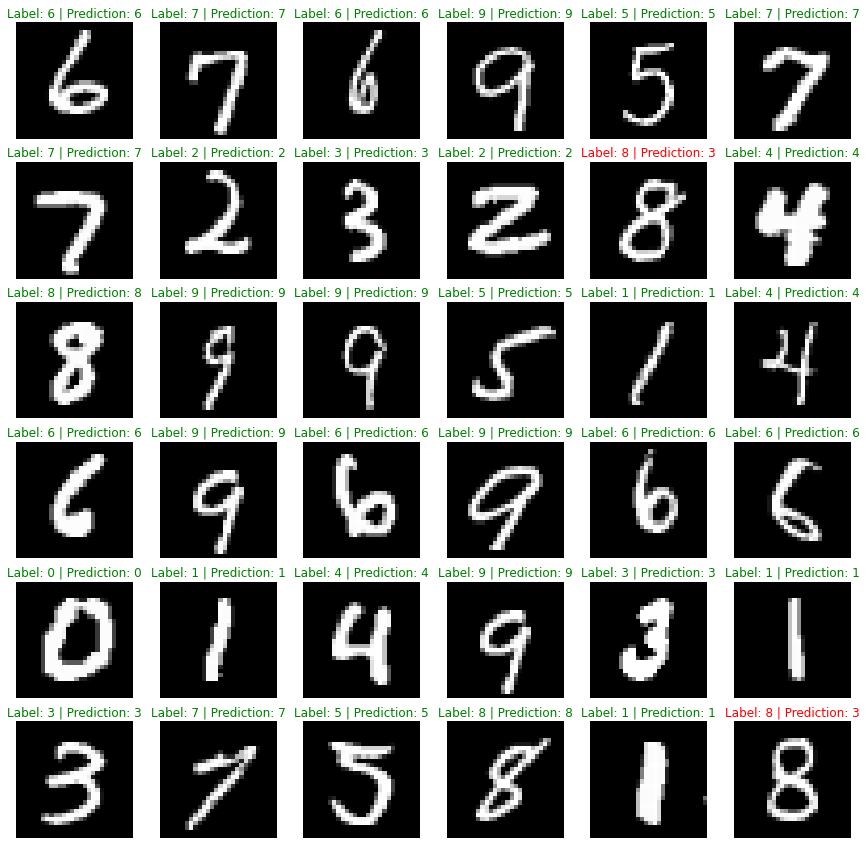

In [39]:
idx = np.random.choice(len(X_test), size = 36, replace = True)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6,6, figsize = (15,15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {'color': 'g'} if label == pred else {'color':'r'}
    
    ax.imshow(img.reshape(28,28), cmap = 'gray')
    ax.set_title(f'Label: {label} | Prediction: {pred}', fontdict = font)
    ax.axis ('off');

# 7. Evaluation

In [40]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

## 7.1. Classification Report

In [41]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      0.99      1.00       160
           3       1.00      1.00      1.00       160
           4       1.00      1.00      1.00       160
           5       0.99      1.00      1.00       160
           6       1.00      0.99      1.00       160
           7       1.00      1.00      1.00       160
           8       1.00      1.00      1.00       160
           9       0.99      0.99      0.99       160

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


Test report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.95      0.93      0.94        40
           2       0.89      1.00      0.94        4

### 7.2.1 Confusion Matrix for Training Set

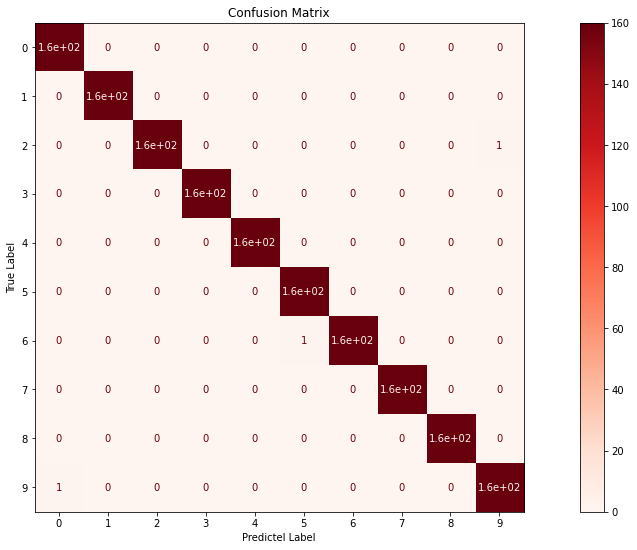

In [42]:
matrix = plot_confusion_matrix(model,X_train, y_train, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predictel Label', color = 'black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(20,9)
plt.show()

### 7.2.2 Confusion Matrix for Testing Set

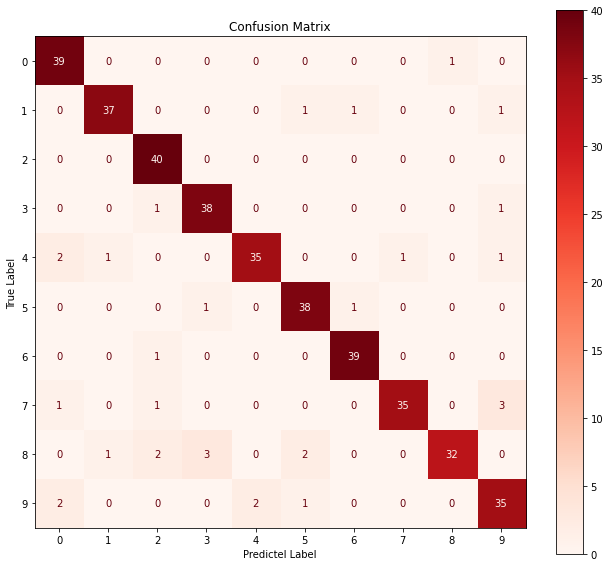

In [43]:
matrix = plot_confusion_matrix(model,X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predictel Label', color = 'black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(11,10)
plt.show()

## 7.3. ROC AUC Score

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
y_prob = model.predict_proba(X_test)

macro_ROCAUC_OvO = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_ROCAUC_OvO = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)

macro_ROCAUC_OvR = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_ROCAUC_OvR = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)


print(
    "One vs One ROCAUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_ROCAUC_OvO, weighted_ROCAUC_OvO)
)

print('------------------------------------------------------------')

print(
    "One vs Rest ROCAUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_ROCAUC_OvR, weighted_ROCAUC_OvR)
)

One vs One ROCAUC scores:
0.994285 (macro),
0.994285 (weighted by prevalence)
------------------------------------------------------------
One vs Rest ROCAUC scores:
0.994285 (macro),
0.994285 (weighted by prevalence)


# 10. Save Model

In [46]:
save_model(model.best_estimator_, 'Image_Classification_Mnist_XGBoost Classifier.pkl')

Model is pickled as model/Image_Classification_Mnist_XGBoost Classifier.pkl
